In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [40]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [41]:
df = pd.concat([X, y], axis=1)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<AxesSubplot:>

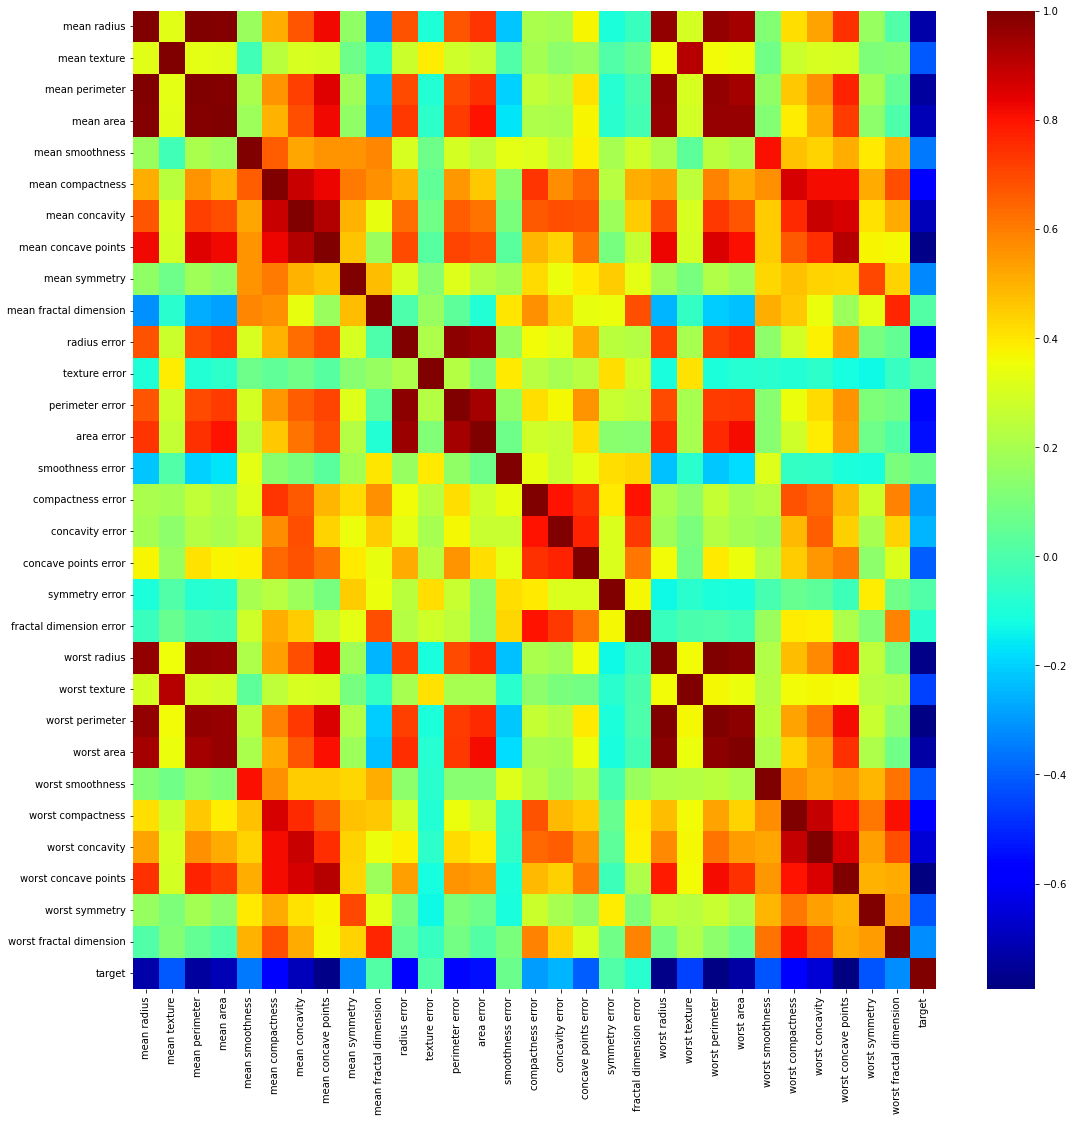

In [42]:
plt.figure(figsize=(18,18))
sns.heatmap( df.corr(), cmap='jet' )

In [43]:
#import sklearn
#sklearn.__version__
#!pip install scikit-learn -U --user

In [44]:
N_FEAT = 5
best_features = {}

In [45]:
best_columns = list( df.corr().iloc[-1].abs().sort_values(ascending=False).iloc[1:N_FEAT+1].index )
best_features["corr"] = best_columns
best_columns

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter']

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [47]:
# estymator na 5 kolumnach wyznaczonych z wykorzystaniem korelacji (ręcznie)
X_train, X_test, y_train, y_test  = train_test_split(df[best_columns], y, test_size=.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

0.9298245614035088


,0,1
0,44,3
1,5,62


In [48]:
from sklearn.feature_selection import SelectKBest, chi2

In [49]:
# estymator na podstawie wyboru kolumn w oparciu o klase SelectKBest
fe = SelectKBest(chi2, k=N_FEAT)
fe.fit(X, y)
best_columns = X.iloc[ : , fe.get_support() ].columns.tolist()
best_features["select_k_best"] = best_columns
print(best_columns)

X_train, X_test, y_train, y_test  = train_test_split(df[best_columns], y, test_size=.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']
0.9298245614035088


,0,1
0,43,4
1,4,63


In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [51]:
# Technika RFE
fe = RFE( DecisionTreeClassifier(random_state=0) , n_features_to_select=N_FEAT )
fe.fit(X, y)
best_columns = X.iloc[ : , fe.get_support() ].columns.tolist()
best_features["rfe"] = best_columns
print(best_columns)

X_train, X_test, y_train, y_test  = train_test_split(df[best_columns], y, test_size=.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

['worst radius', 'worst texture', 'worst area', 'worst smoothness', 'worst concave points']
0.9649122807017544


,0,1
0,45,2
1,2,65


In [55]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [58]:
# Technika "opakowywania"
# fe = RFE( DecisionTreeClassifier(random_state=0) , n_features_to_select=N_FEAT )
fe = SelectFromModel( RandomForestClassifier(random_state=0, n_estimators=100) , max_features=N_FEAT )
fe.fit(X, y)
best_columns = X.iloc[ : , fe.get_support() ].columns.tolist()
best_features["select_from_model"] = best_columns
print(best_columns)

X_train, X_test, y_train, y_test  = train_test_split(df[best_columns], y, test_size=.2, random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test) ))

['mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']
0.9298245614035088


,0,1
0,42,5
1,3,64


In [62]:
for key in best_features:
    print(f"{key} - {sorted(best_features[key])}")

corr - ['mean concave points', 'mean perimeter', 'worst concave points', 'worst perimeter', 'worst radius']
select_k_best - ['area error', 'mean area', 'mean perimeter', 'worst area', 'worst perimeter']
rfe - ['worst area', 'worst concave points', 'worst radius', 'worst smoothness', 'worst texture']
select_from_model - ['mean concave points', 'worst area', 'worst concave points', 'worst perimeter', 'worst radius']
